In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)

In [5]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
dataset['Price']=housing.target

In [7]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [10]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.fit_transform(X_test)

In [14]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regression=LinearRegression()

In [17]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
## print the coefficients and the intercept
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [19]:
print(regression.intercept_)

2.0692396089424165


In [20]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)
reg_pred

array([0.70074765, 1.75651603, 2.73363614, ..., 2.08473667, 1.56199123,
       1.83521508])

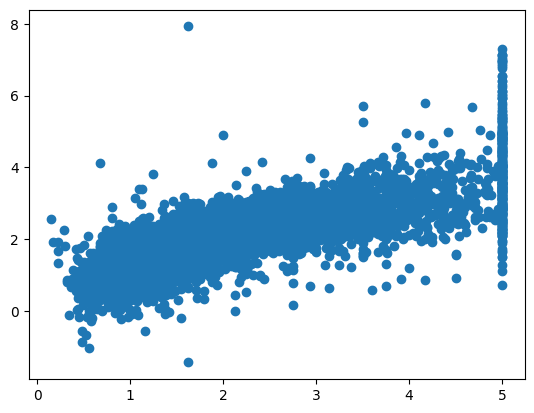

In [21]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5238759626552133
0.5165967398485736
0.7187466451042214


In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6064145112418657


In [24]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.605905262671582

In [25]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [26]:
##transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

c:\Users\Giancarlo\Desktop\MAUA\MachineLearningGian\Projetos_ML\proj_California_Houses\California_Predctions\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 2.36730311,  0.97542743,  0.62520012, -0.13139628, -0.98531614,
        -0.26453569,  1.07314583, -1.34389976]])

In [27]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\Giancarlo\Desktop\MAUA\MachineLearningGian\Projetos_ML\proj_California_Houses\California_Predctions\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.18565815])

In [28]:
import pickle

In [29]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [30]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [31]:
## Prediction
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

c:\Users\Giancarlo\Desktop\MAUA\MachineLearningGian\Projetos_ML\proj_California_Houses\California_Predctions\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.18565815])